# Quantify

MSE and R2 Score

A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.

In [268]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.21345916397734363
R-squared (R2 ): -0.005974823689590236


In [270]:
# Overall Score for the model
model.score(X, y)

-0.0059748236895902362

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [272]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [273]:
model.score(X_test, y_test)

-0.19616544639627098

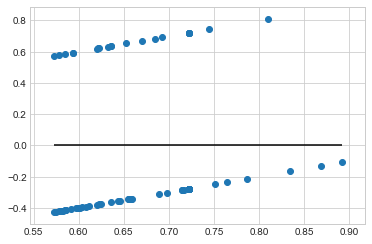

In [274]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

# Attempt to do Logistical Regression USE THIS


In [377]:
new = df[["isAlive", "allegiances_Stark", "culture_Northmen", "age", "allegiances_Wildling", "popularity" ]]
new.head()

,isAlive,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,1,0,0,36.0,0,0.458194
1,1,0,0,29.0,0,0.571906
2,1,1,1,16.0,0,1.000000
3,0,0,0,NaN,0,0.344482
4,1,0,0,30.0,0,0.709030


In [378]:
new['age'] = new['age'].fillna(new['age'].mean())

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [379]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [380]:
# Assign X (data) and y (target)
X = new.drop("isAlive", axis=1)
y = new["isAlive"]
print(X.shape, y.shape)

(72, 5) (72,)


In [381]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [366]:
indexes=X_test.index
list(indexes)
newww= df.iloc[list(indexes)]["name"]
newww.head()

43     Merrett Frey
27     Jeor Mormont
60    Samwell Tarly
9        Bran Stark
12    Brynden Tully
Name: name, dtype: object

In [367]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [368]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [369]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6851851851851852
Testing Data Score: 0.7222222222222222


In [370]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

v = (predictions - y_test)**2

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [0, 0, 1, 1, 1, 1, 1, 1, 0, 1]


In [371]:
sum(v)/ len(v)

0.27777777777777779

In [372]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(20)

,Actual,Prediction,name
0,0,1,Merrett Frey
1,0,1,Jeor Mormont
2,1,1,Samwell Tarly
3,1,1,Bran Stark
4,1,1,Brynden Tully
5,1,1,Mathis Rowan
6,1,1,Edmure Tully
7,1,1,Margaery Tyrell
8,0,1,Luwin
9,1,1,Jon Snow


In [373]:
final_sw = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(72)
final_sw.head()

,Actual,Prediction,name
0,0,1,Merrett Frey
1,0,1,Jeor Mormont
2,1,1,Samwell Tarly
3,1,1,Bran Stark
4,1,1,Brynden Tully


In [374]:
final_sw[(final_sw['Prediction'] == 1) & (final_sw['Actual'] == 0)]

,Actual,Prediction,name
0,0,1,Merrett Frey
1,0,1,Jeor Mormont
8,0,1,Luwin
12,0,1,Joffrey Baratheon
17,0,1,Viserys Targaryen


In [382]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5

In [383]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.46113935867361833, 'age'),
 (0.44671483587338678, 'popularity'),
 (0.055007549223429007, 'allegiances_Stark'),
 (0.032367422695218431, 'culture_Northmen'),
 (0.0047708335343476594, 'allegiances_Wildling')]

# Attempt at Decision Trees

In [358]:
from sklearn import tree
import pandas as pd
import os

In [359]:
target = new["isAlive"]
target_names = ["dead", "alive"]

In [360]:
data = new.drop("isAlive", axis=1)
feature_names = data.columns
data.head()

,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,0,0,36.000000,0,0.458194
1,0,0,29.000000,0,0.571906
2,1,1,16.000000,0,1.000000
3,0,0,37.166667,0,0.344482
4,0,0,30.000000,0,0.709030


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [130]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.62441314553990612

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6619718309859155

In [132]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.95650005069770427, 'popularity'), (0.043499949302295844, 'gender')]

# KMeans Attempt

In [391]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import os

In [392]:
target = new["isAlive"]
target_names = ["dead", "alive"]

In [393]:
data = new.drop("isAlive", axis=1)
feature_names = data.columns
data.head()

,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,0,0,36.000000,0,0.458194
1,0,0,29.000000,0,0.571906
2,1,1,16.000000,0,1.000000
3,0,0,37.166667,0,0.344482
4,0,0,30.000000,0,0.709030


In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [396]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KMeans(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

TypeError: __init__() got an unexpected keyword argument 'n_neighbors'

# Support Vector Machine USE THIS ONE


In [399]:
new = df[["isAlive", "allegiances_Stark", "culture_Northmen", "age", "allegiances_Wildling", "popularity" ]]
new['age'] = new['age'].fillna(new['age'].mean())
new.head()

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,isAlive,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,1,0,0,36.000000,0,0.458194
1,1,0,0,29.000000,0,0.571906
2,1,1,1,16.000000,0,1.000000
3,0,0,0,37.166667,0,0.344482
4,1,0,0,30.000000,0,0.709030


In [400]:
target = new["isAlive"]
target_names = ["dead", "alive"]

In [401]:
data = new.drop("isAlive", axis=1)
feature_names = data.columns
data.head()

,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,0,0,36.000000,0,0.458194
1,0,0,29.000000,0,0.571906
2,1,1,16.000000,0,1.000000
3,0,0,37.166667,0,0.344482
4,0,0,30.000000,0,0.709030


In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [403]:
indexes=X_test.index
list(indexes)

newww= all_characters.iloc[list(indexes)]["name"]
newww.head()

4        Aeron Greyjoy
62         Bearded Ben
18                Alyn
0       Addam Marbrand
28    Andrew Estermont
Name: name, dtype: object

In [404]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [405]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.778


In [406]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

       dead       0.00      0.00      0.00         4
      alive       0.78      1.00      0.88        14

avg / total       0.60      0.78      0.68        18



/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [410]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 1, 0, 1, 1, 0, 1, 0, 1, 1]


In [411]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(20)

,Actual,Prediction,name
0,1,1,Aeron Greyjoy
1,1,1,Bearded Ben
2,0,1,Alyn
3,1,1,Addam Marbrand
4,1,1,Andrew Estermont
5,0,1,Aurane Waters
6,1,1,Albett
7,0,1,Archibald Yronwood
8,1,1,Alerie Hightower
9,1,1,Balon Swann


In [412]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.66666666666666663

In [413]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.47141759584488019, 'popularity'),
 (0.43760503458392608, 'age'),
 (0.052265879604252274, 'allegiances_Stark'),
 (0.033539423829853462, 'culture_Northmen'),
 (0.0051720661370881979, 'allegiances_Wildling')]

# Apply Gridsearch 

In [214]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [215]:
indexes=X_test.index
list(indexes)

newww= all_characters.iloc[list(indexes)]["name"]
newww.head()

512              Mohor
357       Janna Tyrell
110           Caleotte
684      Samwell Tarly
39     Arnolf Karstark
Name: name, dtype: object

In [216]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [217]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [218]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6995305164319249, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6981132075471698, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6981132075471698, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.6995305164319249, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.6981132075471698, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.6981132075471698, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=5, gamma=0.001, score=0.6981132075471698, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.6981132075471698, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ....... C=5, gamma=0.005, score=0.6995305164319249, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ....... C=5, gamma=0.005, score=0.6981132075471698, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ....... C=5, gamma=0.005, score=0.6981132075471698, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.6995305164319249, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.6981132075471698, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [219]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [220]:
print(grid.best_score_)

0.698587127159


In [221]:
predictions = grid.predict(X_test)

In [222]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["alive", "dead"]))

             precision    recall  f1-score   support

      alive       0.00      0.00      0.00        66
       dead       0.69      1.00      0.82       147

avg / total       0.48      0.69      0.56       213



/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [223]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(30)

,Actual,Prediction,name
0,0,1,Mohor
1,1,1,Janna Tyrell
2,1,1,Caleotte
3,1,1,Samwell Tarly
4,1,1,Arnolf Karstark
5,1,1,Bellonara Otherys
6,1,1,Tormund
7,1,1,Ghost of High Heart
8,0,1,Varamyr
9,0,1,Mandon Moore
